In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [6]:
data = pd.read_excel("Online Retail.xlsx")
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [7]:
df = data.copy()

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
pd.set_option('display.max_colwidth', 200)

In [10]:
df.shape

(541909, 8)

In [11]:
df.describe().T

count                           mean                  min  \
Quantity     541909.0                        9.55225             -80995.0   
InvoiceDate    541909  2011-07-04 13:34:57.156386048  2010-12-01 08:26:00   
UnitPrice    541909.0                       4.611114            -11062.06   
CustomerID   406829.0                    15287.69057              12346.0   

                             25%                  50%                  75%  \
Quantity                     1.0                  3.0                 10.0   
InvoiceDate  2011-03-28 11:34:00  2011-07-19 17:17:00  2011-10-19 11:27:00   
UnitPrice                   1.25                 2.08                 4.13   
CustomerID               13953.0              15152.0              16791.0   

                             max          std  
Quantity                 80995.0   218.081158  
InvoiceDate  2011-12-09 12:50:00          NaN  
UnitPrice                38970.0    96.759853  
CustomerID               18287.0  1713.600303

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
df[df["Description"]=='NONE']

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [15]:
df.dropna(subset=['Description'], inplace=True)

In [16]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [17]:
df = df[~(
    (df['StockCode'].str.upper().isin(['POST', 'M', 'S', 'PADS', 'DOT', 'D', 'C2', 'BANK CHARGES', 'AMAZONFEE', 'CRUK'])) |
    (df['InvoiceNo'].str.startswith('C', na=False)) |
    (df['StockCode'].str.startswith('gift', na=False))
)]

In [34]:
df.shape

(527759, 13)

In [35]:
df = df[df['Quantity'] > 0]

In [36]:
df = df[df['UnitPrice'] > 0]

In [37]:
df.shape

(527759, 13)

In [38]:
df['date'] = df['InvoiceDate'].dt.date

In [39]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        date  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   

   Year  Month  Day  Total Amount  
0  2010     12    1         15.30  
1  2010     12    1         20.34  
2  2010     12    1         22.00  
3  2010     12    1         20.34  
4  2010     12    1         20.34

In [40]:
df['Year'] = df['date'].apply(lambda x: x.year)
df['Month'] = df['date'].apply(lambda x: x.month)
df['Day'] = df['date'].apply(lambda x: x.day)

In [41]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        date  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   

   Year  Month  Day  Total Amount  
0  2010     12    1         15.30  
1  2010     12    1         20.34  
2  2010     12    1         22.00  
3  2010     12    1         20.34  
4  2010     12    1         20.34

In [42]:
df['Total Amount'] = df['Quantity']*df['UnitPrice']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        date  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   

   Year  Month  Day  Total Amount  
0  2010     12    1         15.30  
1  2010     12    1         20.34  
2  2010     12    1         22.00  
3  2010     12    1         20.34  
4  2010     12    1         20.34

In [43]:
top_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)
top_selling_products

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
PACK OF 12 LONDON TISSUES             26135
PACK OF 60 PINK PAISLEY CAKE CASES    24854
VICTORIAN GLASS HANGING T-LIGHT       24304
ASSORTED COLOURS SILK FAN             23826
BROCADE RING PURSE                    23056
RED  HARMONICA IN BOX                 21933
JUMBO BAG PINK POLKADOT               21465
SMALL POPCORN HOLDER                  20160
PAPER CHAIN KIT 50'S CHRISTMAS        19355
LUNCH BAG RED RETROSPOT               19353
Name: Quantity, dtype: int64

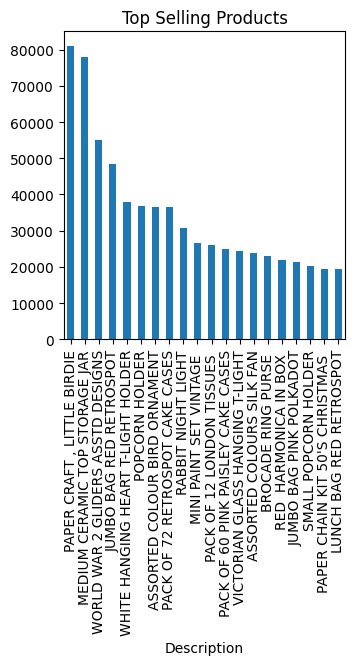

In [44]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
top_selling_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.show()

In [45]:
customerVsCountry = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(20)
customerVsCountry

Country
United Kingdom     3916
Germany              94
France               87
Spain                30
Belgium              25
Switzerland          21
Portugal             19
Italy                14
Finland              12
Austria              11
Norway               10
Channel Islands       9
Netherlands           9
Australia             9
Denmark               9
Cyprus                8
Japan                 8
Sweden                8
Poland                6
Unspecified           4
Name: CustomerID, dtype: int64

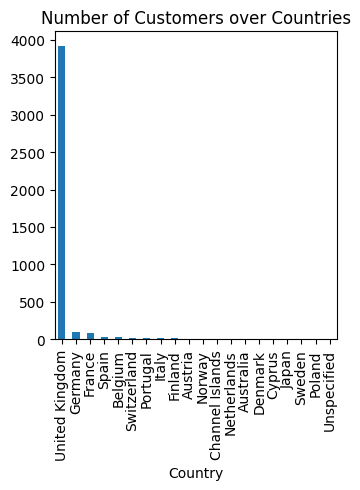

In [46]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
customerVsCountry.plot(kind='bar')
plt.title('Number of Customers over Countries')
plt.show()

In [47]:
OrdersVsCountry = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(20)
OrdersVsCountry

Country
United Kingdom     17902
Germany              443
France               382
EIRE                 282
Belgium               98
Netherlands           93
Spain                 88
Australia             56
Portugal              50
Switzerland           50
Finland               40
Italy                 35
Sweden                34
Norway                32
Channel Islands       25
Poland                19
Japan                 19
Denmark               18
Austria               17
Cyprus                14
Name: InvoiceNo, dtype: int64

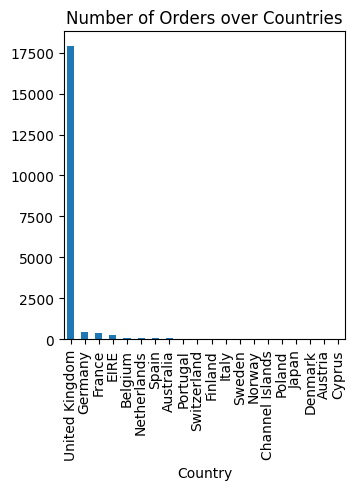

In [48]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
OrdersVsCountry.plot(kind='bar')
plt.title('Number of Orders over Countries')
plt.show()

In [49]:
top_pop_products = df.groupby('Description')['CustomerID'].nunique().sort_values(ascending=False).head(20)
top_pop_products

Description
REGENCY CAKESTAND 3 TIER              881
WHITE HANGING HEART T-LIGHT HOLDER    856
PARTY BUNTING                         708
ASSORTED COLOUR BIRD ORNAMENT         678
SET OF 3 CAKE TINS PANTRY DESIGN      640
JUMBO BAG RED RETROSPOT               635
PACK OF 72 RETROSPOT CAKE CASES       635
PAPER CHAIN KIT 50'S CHRISTMAS        613
NATURAL SLATE HEART CHALKBOARD        587
BAKING SET 9 PIECE RETROSPOT          581
JAM MAKING SET WITH JARS              573
HEART OF WICKER SMALL                 573
SPOTTY BUNTING                        571
JAM MAKING SET PRINTED                537
LUNCH BAG RED RETROSPOT               532
LUNCH BAG SPACEBOY DESIGN             490
RETROSPOT TEA SET CERAMIC 11 PC       488
HEART OF WICKER LARGE                 485
REX CASH+CARRY JUMBO SHOPPER          480
LUNCH BAG CARS BLUE                   479
Name: CustomerID, dtype: int64

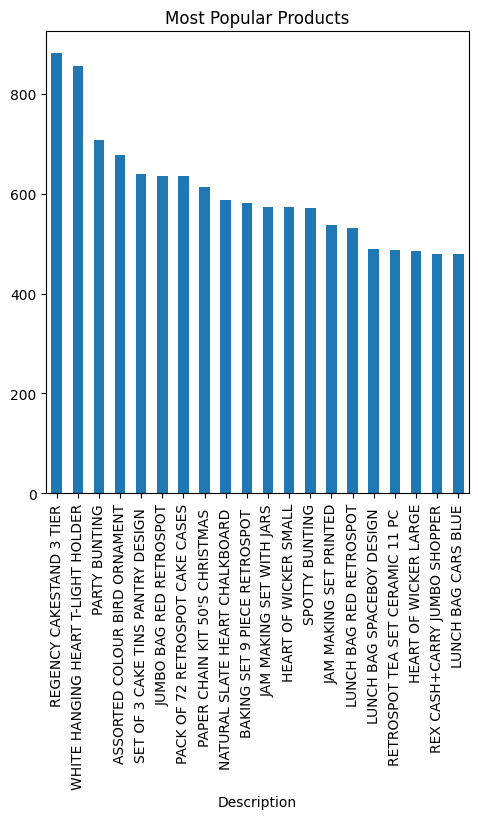

In [50]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
top_pop_products.plot(kind='bar')
plt.title('Most Popular Products')
plt.show()

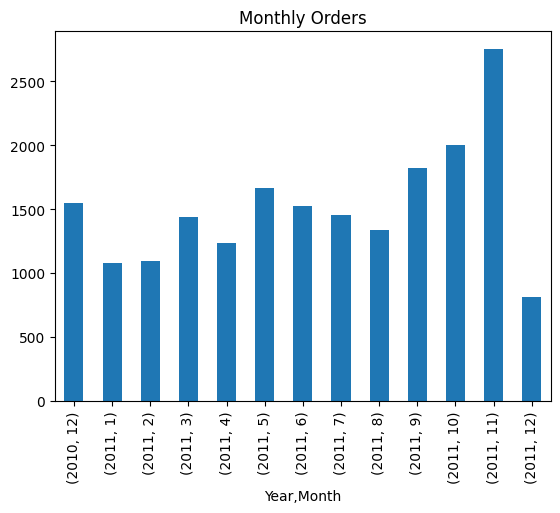

In [51]:
df.groupby(['Year','Month'])['InvoiceNo'].nunique().plot(kind='bar', title='Monthly Orders')
plt.show()

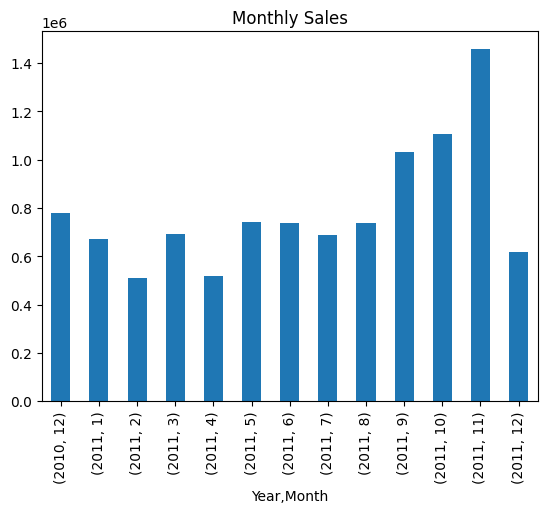

In [52]:
df.groupby(['Year','Month'])['Total Amount'].sum().plot(kind='bar', title='Monthly Sales')
plt.show()

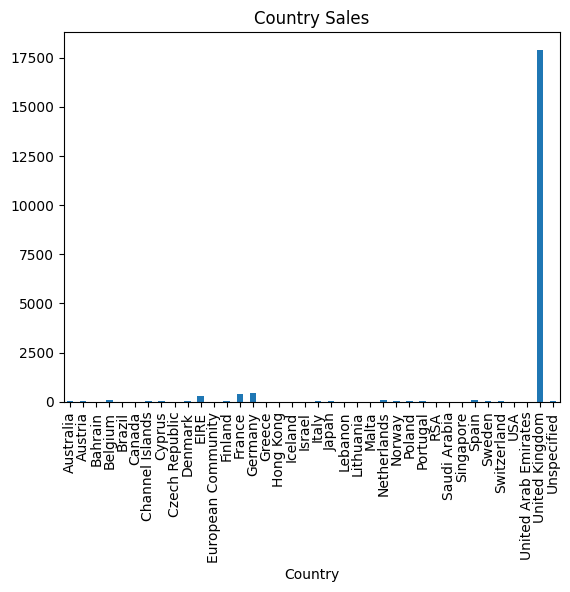

In [53]:
df.groupby(['Country'])['InvoiceNo'].nunique().plot(kind='bar', title='Country Sales')
plt.show()

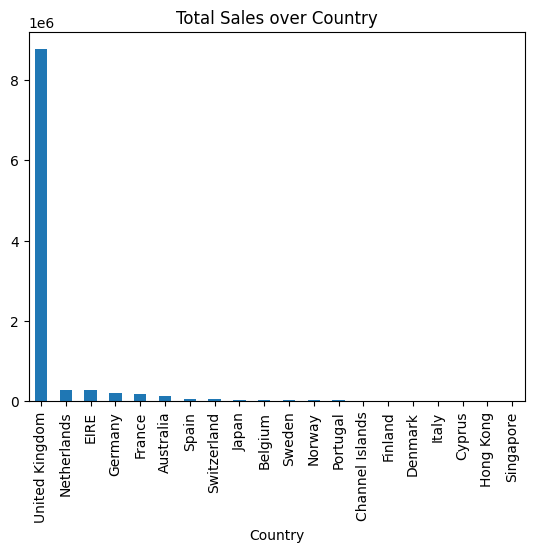

In [54]:
df.groupby(['Country'])['Total Amount'].sum().sort_values(ascending=False).head(20).plot(kind='bar', title='Total Sales over Country')
plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527759 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     527759 non-null  object        
 1   StockCode     527759 non-null  object        
 2   Description   527759 non-null  object        
 3   Quantity      527759 non-null  int64         
 4   InvoiceDate   527759 non-null  datetime64[ns]
 5   UnitPrice     527759 non-null  float64       
 6   CustomerID    396337 non-null  float64       
 7   Country       527759 non-null  object        
 8   date          527759 non-null  object        
 9   Year          527759 non-null  int64         
 10  Month         527759 non-null  int64         
 11  Day           527759 non-null  int64         
 12  Total Amount  527759 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 56.4+ MB


In [56]:
df.Description.nunique()

4013

In [57]:
df.CustomerID.nunique()

4334

In [58]:
df.Country.nunique()

38

In [59]:
top_countries = df.groupby('Country')['Total Amount'].sum().sort_values(ascending=False).head(3).index.tolist()
print("Top 3 Countries:", top_countries)

Top 3 Countries: ['United Kingdom', 'Netherlands', 'EIRE']


In [60]:
top_countries = df['Country'].value_counts().head(3).index.tolist()
print("Top 3 Countries:", top_countries)

Top 3 Countries: ['United Kingdom', 'Germany', 'France']


In [61]:
df_uk = df[df['Country'].isin(['United Kingdom'])]

In [62]:
df_uk.Country.value_counts()

Country
United Kingdom    484005
Name: count, dtype: int64

In [63]:
df_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        date  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   

   Year  Month  Day  Total Amount  
0  2010     12    1         15.30  
1  2010     12    1         20.34  
2  2010     12    1         22.00  
3  2010     12    1         20.34  
4  2010     12    1         20.34

In [64]:
transaction_list_uk = []

# For loop to create a list of the unique transactions throughout the dataset
for i in df_uk['InvoiceNo'].unique():
    tlist = list(set(df_uk[df_uk['InvoiceNo'] == i]['Description'].astype(str)))
    if len(tlist)>0:
        transaction_list_uk.append(tlist)
print(len(transaction_list_uk))

transaction_list_uk

17902


[['WHITE METAL LANTERN',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK'],
 ['LOVE BUILDING BLOCK WORD',
  'IVORY KNITTED MUG COSY ',
  'ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE KITCHEN",
  'RECIPE BOX WITH METAL HEART',
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  "POPPY'S PLAYHOUSE BEDROOM ",
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'DOORMAT NEW ENGLAND'],
 ['BLUE COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD'],
 ["PAPER CHAIN KIT 50'S CHRISTMAS "],
 ['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK'],
 ['WHITE METAL LANTERN',
  'RETRO

In [66]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list_uk).transform(transaction_list_uk)
df1 = pd.DataFrame(te_ary, columns=te.columns_)
df1

4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
0                               False                           False   
1                               False                           False   
2                               False                           False   
3                               False                           False   
4                               False                           False   
...                               ...                             ...   
17897                           False                           False   
17898                           False                           False   
17899                           False                           False   
17900                           False                           False   
17901                           False                           False   

        DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
0                   False                         False   
1                   False                         False   
2                   False                         False   
3                   False                         False   
4                   False                         False   
...                   ...                           ...   
17897               False                         False   
17898               False                         False   
17899               False                         False   
17900               False                         False   
17901               False                         False   

        NINE DRAWER OFFICE TIDY   OVAL WALL MIRROR DIAMANTE   \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
...                         ...                          ...   
17897                     False                        False   
17898                     False                        False   
17899                     False                        False   
17900                     False                        False   
17901                     False                        False   

        RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON   \
0                         False                             False   
1                         False                             False   
2                         False                             False   
3                         False                             False   
4                         False                             False   
...                         ...                               ...   
17897                     False                             False   
17898                     False                             False   
17899                     False                             False   
17900                     False                             False   
17901                     False                             False   

        SPACEBOY BABY GIFT SET   TOADSTOOL BEDSIDE LIGHT    TRELLIS COAT RACK  \
0                        False                      False               False   
1                        False                      False               False   
2                        False                      False               False   
3                        False                      False               False   
4                        False                      False               False   
...                        ...                        ...                 ...   
17897                    False                      False               False   
17898                    False                      False               False   
17899                    False                      False               False   
17900         

In [67]:
frequent_itemsets_uk = apriori(df1, min_support=0.01, use_colnames=True)
frequent_itemsets_uk.sort_values('support', ascending=False).head(20)

support                              itemsets
782  0.120769  (WHITE HANGING HEART T-LIGHT HOLDER)
357  0.108088             (JUMBO BAG RED RETROSPOT)
562  0.094124            (REGENCY CAKESTAND 3 TIER)
472  0.088984                       (PARTY BUNTING)
397  0.077757             (LUNCH BAG RED RETROSPOT)
55   0.076584       (ASSORTED COLOUR BIRD ORNAMENT)
630  0.069322   (SET OF 3 CAKE TINS PANTRY DESIGN )
425  0.068093     (NATURAL SLATE HEART CHALKBOARD )
389  0.067925             (LUNCH BAG  BLACK SKULL.)
309  0.065021               (HEART OF WICKER SMALL)
355  0.064741             (JUMBO BAG PINK POLKADOT)
366  0.063289   (JUMBO SHOPPER VINTAGE RED PAISLEY)
368  0.063121              (JUMBO STORAGE BAG SUKI)
451  0.063066     (PACK OF 72 RETROSPOT CAKE CASES)
465  0.062842     (PAPER CHAIN KIT 50'S CHRISTMAS )
800  0.060105   (WOODEN PICTURE FRAME WHITE FINISH)
392  0.059491                 (LUNCH BAG CARS BLUE)
708  0.058094                      (SPOTTY BUNTING)
398  0.057982          (LUNCH BAG SPACEBOY DESIGN )
524  0.057368     (RECIPE BOX PANTRY YELLOW DESIGN)

In [139]:
rules_uk = association_rules(frequent_itemsets_uk, metric='lift', min_threshold=1.0)
rules_uk.sort_values('lift', ascending=False)

antecedents  \
3614  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)   
3611        (HERB MARKER THYME, HERB MARKER MINT)   
3601  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)   
3596       (HERB MARKER THYME, HERB MARKER BASIL)   
3613     (HERB MARKER MINT, HERB MARKER ROSEMARY)   
...                                           ...   
1708         (WHITE HANGING HEART T-LIGHT HOLDER)   
1570         (WHITE HANGING HEART T-LIGHT HOLDER)   
1571            (PAPER CHAIN KIT 50'S CHRISTMAS )   
961                    (REGENCY CAKESTAND 3 TIER)   
960                     (JUMBO BAG RED RETROSPOT)   

                                      consequents  antecedent support  \
3614        (HERB MARKER THYME, HERB MARKER MINT)            0.011563   
3611  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)            0.011172   
3601       (HERB MARKER THYME, HERB MARKER BASIL)            0.011563   
3596  (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)            0.011340   
3613     (HERB MARKER THYME, HERB MARKER PARSLEY)            0.011451   
...                                           ...                 ...   
1708                   (REGENCY CAKESTAND 3 TIER)            0.120769   
1570            (PAPER CHAIN KIT 50'S CHRISTMAS )            0.120769   
1571         (WHITE HANGING HEART T-LIGHT HOLDER)            0.062842   
961                     (JUMBO BAG RED RETROSPOT)            0.094124   
960                    (REGENCY CAKESTAND 3 TIER)            0.108088   

      consequent support   support  confidence       lift  representativity  \
3614            0.011172  0.010055    0.869565  77.834783               1.0   
3611            0.011563  0.010055    0.900000  77.834783               1.0   
3601            0.011340  0.010055    0.869565  76.684515               1.0   
3596            0.011563  0.010055    0.886700  76.684515               1.0   
3613            0.011563  0.010055    0.878049  75.936373               1.0   
...                  ...       ...         ...        ...               ...   
1708            0.094124  0.018769    0.155412   1.651145               1.0   
1570            0.062842  0.011284    0.093432   1.486773               1.0   
1571            0.120769  0.011284    0.179556   1.486773               1.0   
961             0.108088  0.014412    0.153116   1.416578               1.0   
960             0.094124  0.014412    0.133333   1.416578               1.0   

      leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
3614  0.009926    7.581015       0.998700  0.792952   0.868092    0.884783  
3611  0.009926    9.884370       0.998305  0.792952   0.898830    0.884783  
3601  0.009924    7.579730       0.998505  0.782609   0.868069    0.878132  
3596  0.009924    8.724031       0.998280  0.782609   0.885374    0.878132  
3613  0.009922    8.105184       0.998262  0.775862   0.876622    0.873807  
...        ...         ...            ...       ...        ...         ...  
1708  0.007402    1.072566       0.448528  0.095699   0.067656    0.177409  
1570  0.003694    1.033742       0.372373  0.065478   0.032641    0.136494  
1571  0.003694    1.071653       0.349357  0.065478   0.066862    0.136494  
961   0.004238    1.053168       0.324628  0.076740   0.050484    0.143225  
960   0.004238    1.045242       0.329711  0.076740   0.043284    0.143225  

[3986 rows x 14 columns]

In [68]:
df_gem = df[df['Country'].isin(['Germany'])]

In [69]:
df_gem.Country.value_counts()

Country
Germany    8658
Name: count, dtype: int64

In [70]:
df_gem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8658 entries, 1109 to 541805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     8658 non-null   object        
 1   StockCode     8658 non-null   object        
 2   Description   8658 non-null   object        
 3   Quantity      8658 non-null   int64         
 4   InvoiceDate   8658 non-null   datetime64[ns]
 5   UnitPrice     8658 non-null   float64       
 6   CustomerID    8658 non-null   float64       
 7   Country       8658 non-null   object        
 8   date          8658 non-null   object        
 9   Year          8658 non-null   int64         
 10  Month         8658 non-null   int64         
 11  Day           8658 non-null   int64         
 12  Total Amount  8658 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 947.0+ KB


In [71]:
df_gem.head()

InvoiceNo StockCode                          Description  Quantity  \
1109    536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1110    536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
1111    536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   
1112    536527     22242        5 HOOK HANGER MAGIC TOADSTOOL        12   
1113    536527     22244           3 HOOK HANGER MAGIC GARDEN        12   

             InvoiceDate  UnitPrice  CustomerID  Country        date  Year  \
1109 2010-12-01 13:04:00       2.95     12662.0  Germany  2010-12-01  2010   
1110 2010-12-01 13:04:00       2.55     12662.0  Germany  2010-12-01  2010   
1111 2010-12-01 13:04:00       0.85     12662.0  Germany  2010-12-01  2010   
1112 2010-12-01 13:04:00       1.65     12662.0  Germany  2010-12-01  2010   
1113 2010-12-01 13:04:00       1.95     12662.0  Germany  2010-12-01  2010   

      Month  Day  Total Amount  
1109     12    1          17.7  
1110     12    1          15.3  
1111     12    1          10.2  
1112     12    1          19.8  
1113     12    1          23.4

In [72]:
transaction_list_gem = []

# For loop to create a list of the unique transactions throughout the dataset
for i in df_gem['InvoiceNo'].unique():
    tlist = list(set(df_gem[df_gem['InvoiceNo'] == i]['Description'].astype(str)))
    if len(tlist)>0:
        transaction_list_gem.append(tlist)
print(len(transaction_list_gem))

transaction_list_gem

443


[['SET OF 6 T-LIGHTS SANTA',
  'ASSORTED COLOUR LIZARD SUCTION HOOK',
  '5 HOOK HANGER RED MAGIC TOADSTOOL',
  'PACK 3 FIRE ENGINE/CAR PATCHES',
  'MULTI COLOUR SILVER T-LIGHT HOLDER',
  'JUMBO BAG OWLS',
  "CHILDREN'S CIRCUS PARADE MUG",
  'HOMEMADE JAM SCENTED CANDLES',
  'PICTURE DOMINOES',
  '3 HOOK HANGER MAGIC GARDEN',
  '5 HOOK HANGER MAGIC TOADSTOOL',
  'ROTATING SILVER ANGELS T-LIGHT HLDR',
  'JUMBO BAG WOODLAND ANIMALS',
  'HOT WATER BOTTLE BABUSHKA '],
 ['6 RIBBONS RUSTIC CHARM',
  'PACK OF 60 PINK PAISLEY CAKE CASES',
  'JAM MAKING SET PRINTED',
  'JAM JAR WITH GREEN LID',
  'SWEETHEART CAKESTAND 3 TIER',
  'CAKE STAND WHITE TWO TIER LACE',
  'PACK OF 72 RETROSPOT CAKE CASES',
  'JAM JAR WITH PINK LID',
  '60 CAKE CASES VINTAGE CHRISTMAS',
  '60 TEATIME FAIRY CAKE CASES'],
 ['6 RIBBONS RUSTIC CHARM',
  'WOODLAND  HEIGHT CHART STICKERS ',
  'CHILDS BREAKFAST SET SPACEBOY ',
  'CHILDS BREAKFAST SET CIRCUS PARADE',
  'FELTCRAFT 6 FLOWER FRIENDS',
  'DINOSAURS  WRITING SET ',
 

In [73]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list_gem).transform(transaction_list_gem)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
df2

50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
0                             False               False   
1                             False               False   
2                             False               False   
3                             False               False   
4                             False               False   
..                              ...                 ...   
438                           False               False   
439                           False               False   
440                           False               False   
441                           False               False   
442                           False               False   

      I LOVE LONDON MINI BACKPACK   RED SPOT GIFT BAG LARGE  \
0                           False                     False   
1                           False                     False   
2                           False                     False   
3                           False                     False   
4                           False                     False   
..                            ...                       ...   
438                         False                     False   
439                         False                     False   
440                         False                     False   
441                         False                     False   
442                         False                     False   

      SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
0                               False                    False   
1                               False                    False   
2                               False                    False   
3                               False                    False   
4                               False                    False   
..                                ...                      ...   
438                             False                    False   
439                             False                    False   
440                             False                    False   
441                             False                    False   
442                             False                    False   

     10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
0                     False                       False   
1                     False                       False   
2                     False                       False   
3                     False                       False   
4                     False                       False   
..                      ...                         ...   
438                   False                       False   
439                   False                       False   
440                   False                       False   
441                   False                       False   
442                   False                       False   

     12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  \
0                               False                            False   
1                               False                            False   
2                               False                            False   
3                               False                            False   
4                               False                            False   
..                                ...                              ...   
438                             False                            False   
439                             False                            False   
440                             False                            False   
441                             False                            False   
442                             False                            False   

     12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  \
0                            False                                False   

In [74]:
#itemsets with at least 1% support
frequent_itemsets_gem = apriori(df2, min_support=0.01, use_colnames=True)
frequent_itemsets_gem.sort_values('support', ascending=False).head(20)

support  \
388   0.252822   
386   0.162528   
310   0.142212   
361   0.142212   
2072  0.135440   
524   0.130926   
305   0.119639   
307   0.110609   
467   0.106095   
20    0.106095   
208   0.103837   
359   0.099323   
191   0.094808   
274   0.088036   
227   0.081264   
481   0.081264   
202   0.081264   
1798  0.076749   
175   0.074492   
339   0.072235   

                                                                       itemsets  
388                                       (ROUND SNACK BOXES SET OF4 WOODLAND )  
386                                        (ROUND SNACK BOXES SET OF 4 FRUITS )  
310                                          (PLASTERS IN TIN WOODLAND ANIMALS)  
361                                                  (REGENCY CAKESTAND 3 TIER)  
2072  (ROUND SNACK BOXES SET OF 4 FRUITS , ROUND SNACK BOXES SET OF4 WOODLAND )  
524                                                    (WOODLAND CHARLOTTE BAG)  
305                                            (PLASTERS IN TIN CIRCUS PARADE )  
307                                                  (PLASTERS IN TIN SPACEBOY)  
467                                                       (SPACEBOY LUNCH BOX )  
20                                                     (6 RIBBONS RUSTIC CHARM)  
208                                                (JUMBO BAG WOODLAND ANIMALS)  
359                                             (RED TOADSTOOL LED NIGHT LIGHT)  
191                                                    (JAM MAKING SET PRINTED)  
274                                           (PACK OF 72 RETROSPOT CAKE CASES)  
227                                                        (LUNCH BAG WOODLAND)  
481                                         (STRAWBERRY LUNCH BOX WITH CUTLERY)  
202                                                   (JUMBO BAG RED RETROSPOT)  
1798    (ROUND SNACK BOXES SET OF4 WOODLAND , PLASTERS IN TIN WOODLAND ANIMALS)  
175                                                         (GUMBALL COAT RACK)  
339                                               (RED RETROSPOT CHARLOTTE BAG)

In [75]:
rules_germany = association_rules(frequent_itemsets_gem, metric='lift', min_threshold=1.0)
rules_germany.sort_values('lift', ascending=False).head(20)

antecedents  \
17318  (SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)   
17317    (SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
14584                                  (PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)   
14586                                    (PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
17314   (SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)   
17313     (SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
17328                                  (PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)   
17327                                    (PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
14587                                 (PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)   
14589                                   (SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
17331                                   (SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
17332                                 (PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)   
15848                                        (STORAGE TIN VINTAGE DOILY , STORAGE TIN VINTAGE LEAF)   
15845                            (SET OF 4 KNICK KNACK TINS DOILY , ROUND STORAGE TIN VINTAGE LEAF)   
15946                                                  (6 RIBBONS RUSTIC CHARM, CARD CIRCUS PARADE)   
17322   (PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
9407                                                                (POPPY'S PLAYHOUSE LIVINGROOM )   
9404                                     (POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE LIVINGROOM )   
9399                                                                   (POPPY'S PLAYHOUSE BATHROOM)   
9398                                    (POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE LIVINGROOM )   

                                                                                        consequents  \
17318                                    (PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
17317                                  (PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)   
14584                                   (SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
14586                                 (PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)   
17314                                   (SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
17313                                 (PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)   
17328    (SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
17327  (SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)   
14587                                    (PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
14589                                  (PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)   
17331   (SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)   
17332     (SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
15848                            (SET OF 4 KNICK KNACK TINS DOILY , ROUND STORAGE TIN VINTAGE LEAF)   
15845                                        (STORAGE TIN VINTAGE DOILY , STORAGE TIN VINTAGE LEAF)   
15946            (RED  HARMONICA IN BOX , ROBOT BIRTHDAY CARD, ROUND SNACK BOXES SET OF4 WOODLAND )   
17322                                   (SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER CUPS)   
9407                                        (POPPY'S PLAYHOUSE BATHROOM, POPPY'S PLAYHOUSE KITCHEN)   
9404                                                                  

In [76]:
import pandas as pd

# Create a new column representing the full itemset
rules_germany['itemset'] = rules_germany.apply(lambda row: tuple(sorted(row['antecedents'].union(row['consequents']))), axis=1)

# Drop duplicates
deduped_rules = rules_germany.sort_values('lift', ascending=False).drop_duplicates(subset='itemset')

# Drop the helper column if no longer needed
deduped_rules.drop(columns='itemset', inplace=True)

# View the top deduplicated rules
deduped_rules.sort_values('lift', ascending=False).head(20)
# rules.sort_values('lift', ascending=False).head(20)

antecedents  \
17318  (SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)   
15848                                        (STORAGE TIN VINTAGE DOILY , STORAGE TIN VINTAGE LEAF)   
14584                                  (PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)   
9407                                                                (POPPY'S PLAYHOUSE LIVINGROOM )   
15830                                        (STORAGE TIN VINTAGE LEAF, SET OF 3 REGENCY CAKE TINS)   
2575                                                                (POPPY'S PLAYHOUSE LIVINGROOM )   
9399                                                                   (POPPY'S PLAYHOUSE BATHROOM)   
14599                               (SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)   
15946                                                  (6 RIBBONS RUSTIC CHARM, CARD CIRCUS PARADE)   
15205                                   (POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE LIVINGROOM )   
17550                       (REGENCY CAKESTAND 3 TIER, RED  HARMONICA IN BOX , SPACEBOY LUNCH BOX )   
14668                           (PANTRY MAGNETIC  SHOPPING LIST, SET OF 4 KNICK KNACK TINS LONDON )   
14617                                 (PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)   
14640                                   (SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER CUPS)   
14626                               (SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)   
16156                                              (6 RIBBONS RUSTIC CHARM, SPACEBOY BIRTHDAY CARD)   
10646                         (ROUND STORAGE TIN VINTAGE LEAF, SET OF TEA COFFEE SUGAR TINS PANTRY)   
13173                            (CHILDRENS CUTLERY DOLLY GIRL , LUNCH BOX WITH CUTLERY RETROSPOT )   
4786                                                     (PINK POLKADOT WRAP , RED RETROSPOT WRAP )   
3524                                                             (STAR WREATH DECORATION WITH BELL)   

                                                                              consequents  \
17318                          (PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
15848                  (SET OF 4 KNICK KNACK TINS DOILY , ROUND STORAGE TIN VINTAGE LEAF)   
14584                         (SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
9407                              (POPPY'S PLAYHOUSE BATHROOM, POPPY'S PLAYHOUSE KITCHEN)   
15830               (ROUND STORAGE TIN VINTAGE LEAF, SET OF TEA COFFEE SUGAR TINS PANTRY)   
2575                                                         (POPPY'S PLAYHOUSE BATHROOM)   
9399                          (POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE LIVINGROOM )   
14599                          (PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
15946  (RED  HARMONICA IN BOX , ROBOT BIRTHDAY CARD, ROUND SNACK BOXES SET OF4 WOODLAND )   
15205                             (POPPY'S PLAYHOUSE BATHROOM, POPPY'S PLAYHOUSE KITCHEN)   
17550    (6 RIBBONS RUSTIC CHARM, GUMBALL COAT RACK, ROUND SNACK BOXES SET OF4 WOODLAND )   
14668                     (SET OF 3 REGENCY CAKE TINS, SKETCHBOOK MAGNETIC SHOPPING LIST)   
14617                         (SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER CUPS)   
14640                         (SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
14626                         (SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)   
16156     (ROUND SNACK BOXES SET OF4 WOODLAND , ROBOT BIRTHDAY CARD, SPACEBOY LUNCH BOX )   
10646                                                          (STORAGE TIN VINTAGE LEAF)   
13173                 (CHILDRENS CUTLERY CIRCUS PARADE, WOODLAND PARTY BAG + STICKER SET)   
4786                                                                 (BLUE POLKADOT WRAP)   
3524                                                   (WHITE RO

In [77]:
df_frc = df[df['Country'].isin(['France'])]

In [78]:
df_frc.Country.value_counts()

Country
France    8100
Name: count, dtype: int64

In [79]:
df_frc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8100 entries, 26 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     8100 non-null   object        
 1   StockCode     8100 non-null   object        
 2   Description   8100 non-null   object        
 3   Quantity      8100 non-null   int64         
 4   InvoiceDate   8100 non-null   datetime64[ns]
 5   UnitPrice     8100 non-null   float64       
 6   CustomerID    8034 non-null   float64       
 7   Country       8100 non-null   object        
 8   date          8100 non-null   object        
 9   Year          8100 non-null   int64         
 10  Month         8100 non-null   int64         
 11  Day           8100 non-null   int64         
 12  Total Amount  8100 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 885.9+ KB


In [80]:
df_frc.head()

InvoiceNo StockCode                      Description  Quantity  \
26    536370     22728        ALARM CLOCK BAKELIKE PINK        24   
27    536370     22727        ALARM CLOCK BAKELIKE RED         24   
28    536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
29    536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
30    536370     21883                 STARS GIFT TAPE         24   

           InvoiceDate  UnitPrice  CustomerID Country        date  Year  \
26 2010-12-01 08:45:00       3.75     12583.0  France  2010-12-01  2010   
27 2010-12-01 08:45:00       3.75     12583.0  France  2010-12-01  2010   
28 2010-12-01 08:45:00       3.75     12583.0  France  2010-12-01  2010   
29 2010-12-01 08:45:00       0.85     12583.0  France  2010-12-01  2010   
30 2010-12-01 08:45:00       0.65     12583.0  France  2010-12-01  2010   

    Month  Day  Total Amount  
26     12    1          90.0  
27     12    1          90.0  
28     12    1          45.0  
29     12    1          10.2  
30     12    1          15.6

In [81]:
transaction_list_frc = []

# For loop to create a list of the unique transactions throughout the dataset
for i in df_frc['InvoiceNo'].unique():
    tlist = list(set(df_frc[df_frc['InvoiceNo'] == i]['Description'].astype(str)))
    if len(tlist)>0:
        transaction_list_frc.append(tlist)
print(len(transaction_list_frc))

transaction_list_frc

382


[['RED TOADSTOOL LED NIGHT LIGHT',
  'MINI PAINT SET VINTAGE ',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'ROUND SNACK BOXES SET OF4 WOODLAND ',
  'LUNCH BOX I LOVE LONDON',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'INFLATABLE POLITICAL GLOBE ',
  'ALARM CLOCK BAKELIKE RED ',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  'SET/2 RED RETROSPOT TEA TOWELS ',
  'SPACEBOY LUNCH BOX ',
  'CIRCUS PARADE LUNCH BOX ',
  'STARS GIFT TAPE ',
  'MINI JIGSAW CIRCUS PARADE ',
  'VINTAGE HEADS AND TAILS CARD GAME ',
  'MINI JIGSAW SPACEBOY',
  'ALARM CLOCK BAKELIKE PINK',
  ' SET 2 TEA TOWELS I LOVE LONDON '],
 ['MINI JIGSAW SPACEBOY',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'MINI JIGSAW DOLLY GIRL',
  'POLKADOT RAIN HAT ',
  'VINTAGE HEADS AND TAILS CARD GAME ',
  'PICTURE DOMINOES'],
 ['RED RETROSPOT MINI CASES',
  'LUNCH BAG RED RETROSPOT',
  'ASSORTED COLOUR MINI CASES',
  "POPPY'S PLAYHOUSE KITCHEN",
  'LUNCH BOX I LOVE LONDON',
  'LUNCH BAG WOODLAND',
  'EDWARDIAN PARASOL RED'

In [82]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list_frc).transform(transaction_list_frc)
df3 = pd.DataFrame(te_ary, columns=te.columns_)
df3

50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
0                             False               False   
1                             False               False   
2                             False               False   
3                             False               False   
4                             False               False   
..                              ...                 ...   
377                           False               False   
378                           False               False   
379                           False               False   
380                           False               False   
381                           False               False   

      I LOVE LONDON MINI BACKPACK   NINE DRAWER OFFICE TIDY  \
0                           False                     False   
1                           False                     False   
2                           False                     False   
3                           False                     False   
4                           False                     False   
..                            ...                       ...   
377                         False                     False   
378                         False                     False   
379                         False                     False   
380                         False                     False   
381                         False                     False   

      SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
0                                True                    False   
1                               False                    False   
2                               False                    False   
3                               False                    False   
4                               False                    False   
..                                ...                      ...   
377                             False                    False   
378                             False                    False   
379                             False                    False   
380                             False                    False   
381                             False                    False   

      TRELLIS COAT RACK  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
0                 False                   False                       False   
1                 False                   False                       False   
2                 False                   False                       False   
3                 False                   False                       False   
4                 False                   False                       False   
..                  ...                     ...                         ...   
377               False                   False                       False   
378               False                   False                       False   
379               False                   False                       False   
380               False                   False                       False   
381               False                   False                       False   

     12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
0                        False                            False   
1                        False                            False   
2                        False                            False   
3                        False                            False   
4                        False                            False   
..                         ...                              ...   
377                      False                            False   
378                      False                            False   
379                      False                            False   
380                      False                            False   
381                      False                            Fal

In [83]:
# return the items and itemsets with at least 1% support
frequent_itemsets_frc = apriori(df3, min_support=0.01, use_colnames=True)
frequent_itemsets_frc.sort_values('support', ascending=False).head(20)

support                                                      itemsets
332   0.193717                                          (RABBIT NIGHT LIGHT)
371   0.185864                               (RED TOADSTOOL LED NIGHT LIGHT)
321   0.175393                            (PLASTERS IN TIN WOODLAND ANIMALS)
316   0.172775                              (PLASTERS IN TIN CIRCUS PARADE )
401   0.162304                         (ROUND SNACK BOXES SET OF4 WOODLAND )
220   0.157068                                     (LUNCH BAG RED RETROSPOT)
228   0.146597                           (LUNCH BOX WITH CUTLERY RETROSPOT )
355   0.141361                                    (RED RETROSPOT MINI CASES)
318   0.141361                                    (PLASTERS IN TIN SPACEBOY)
466   0.141361                                 (SET/6 RED SPOTTY PAPER CUPS)
459   0.136126                         (SET/20 RED RETROSPOT PAPER NAPKINS )
467   0.130890                               (SET/6 RED SPOTTY PAPER PLATES)
490   0.128272                                         (SPACEBOY LUNCH BOX )
214   0.128272                                      (LUNCH BAG APPLE DESIGN)
374   0.128272                                    (REGENCY CAKESTAND 3 TIER)
4598  0.125654  (SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)
500   0.125654                           (STRAWBERRY LUNCH BOX WITH CUTLERY)
221   0.123037                                  (LUNCH BAG SPACEBOY DESIGN )
226   0.120419                                          (LUNCH BAG WOODLAND)
399   0.109948                          (ROUND SNACK BOXES SET OF 4 FRUITS )

In [84]:
rules_france = association_rules(frequent_itemsets_frc, metric='lift', min_threshold=1.0)
rules_france.sort_values('lift', ascending=False).head(20)

antecedents  \
1139527                                                                (ALARM CLOCK BAKELIKE PINK, DOLLY GIRL CHILDRENS CUP)   
1139520                                                                  (DOLLY GIRL CHILDRENS CUP, LUNCH BOX I LOVE LONDON)   
1139517                                                             (SKULL LUNCH BOX WITH CUTLERY , LUNCH BOX I LOVE LONDON)   
1139534                                                                    (SKULL LUNCH BOX WITH CUTLERY , JUMBO BAG APPLES)   
1139533                                                            (SKULL LUNCH BOX WITH CUTLERY , DOLLY GIRL CHILDRENS CUP)   
374689      (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED , SKULL LUNCH BOX WITH CUTLERY , RED RETROSPOT MINI CASES)   
829439                        (DOLLY GIRL CHILDRENS CUP, LUNCH BAG APPLE DESIGN, JUMBO BAG APPLES, RED RETROSPOT MINI CASES)   
829438     (ALARM CLOCK BAKELIKE GREEN, LUNCH BOX WITH CUTLERY RETROSPOT , LUNCH BAG APPLE DESIGN, RED RETROSPOT MINI CASES)   
829437             (ALARM CLOCK BAKELIKE GREEN, LUNCH BOX WITH CUTLERY RETROSPOT , LUNCH BAG APPLE DESIGN, JUMBO BAG APPLES)   
829436                      (ALARM CLOCK BAKELIKE GREEN, LUNCH BAG APPLE DESIGN, JUMBO BAG APPLES, RED RETROSPOT MINI CASES)   
829435     (ALARM CLOCK BAKELIKE GREEN, DOLLY GIRL CHILDRENS CUP, LUNCH BAG APPLE DESIGN, LUNCH BOX WITH CUTLERY RETROSPOT )   
829434              (ALARM CLOCK BAKELIKE GREEN, DOLLY GIRL CHILDRENS CUP, LUNCH BAG APPLE DESIGN, RED RETROSPOT MINI CASES)   
829433                      (ALARM CLOCK BAKELIKE GREEN, DOLLY GIRL CHILDRENS CUP, LUNCH BAG APPLE DESIGN, JUMBO BAG APPLES)   
829432      (ALARM CLOCK BAKELIKE RED , LUNCH BAG APPLE DESIGN, LUNCH BOX WITH CUTLERY RETROSPOT , RED RETROSPOT MINI CASES)   
829447                      (ALARM CLOCK BAKELIKE RED , JUMBO BAG APPLES, DOLLY GIRL CHILDRENS CUP, LUNCH BOX I LOVE LONDON)   
829446   (ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE GREEN, LUNCH BOX WITH CUTLERY RETROSPOT , LUNCH BOX I LOVE LONDON)   
1139482                                               (DOLLY GIRL CHILDRENS CUP, JUMBO BAG APPLES, RED RETROSPOT MINI CASES)   
1139480                                         (ALARM CLOCK BAKELIKE RED , CHILDRENS CUTLERY DOLLY GIRL , JUMBO BAG APPLES)   
1139478                                 (ALARM CLOCK BAKELIKE RED , CHILDRENS CUTLERY DOLLY GIRL , DOLLY GIRL CHILDRENS CUP)   
1139476                                              (ALARM CLOCK BAKELIKE RED , JUMBO BAG APPLES, DOLLY GIRL CHILDRENS CUP)   

                                                                                                                                                                                                     consequents  \
1139527  (LUNCH BOX WITH CUTLERY RETROSPOT , LUNCH BAG APPLE DESIGN, ROUND SNACK BOXES SET OF4 WOODLAND , LUNCH BOX I LOVE LONDON, SKULL LUNCH BOX WITH CUTLERY , ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAK...   
1139520  (LUNCH BOX WITH CUTLERY RETROSPOT , LUNCH BAG APPLE DESIGN, ROUND SNACK BOXES SET OF4 WOODLAND , ALARM CLOCK BAKELIKE PINK, SKULL LUNCH BOX WITH CUTLERY , ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK B...   
1139517  (LUNCH BOX WITH CUTLERY RETROSPOT , LUNCH BAG APPLE DESIGN, ROUND SNACK BOXES SET OF4 WOODLAND , ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED , DOLLY GIRL CHILDR...   
1139534  (LUNCH BOX WITH CUTLERY RETROSPOT , LUNCH BAG APPLE DESIGN, ROUND SNACK BOXES SET OF4 WOODLAND , LUNCH BOX I LOVE LONDON, ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIK...   
1139533  (LUNCH BOX WITH CUTLERY RETROSPOT , LUNCH BAG APPLE DESIGN, ROUND SNACK BOXES SET OF4 WOODLAND , LUNCH BOX I LOVE LONDON, ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIK...   
374689                                                                                                                                             (DOLL

In [85]:
import pandas as pd

# Create a new column representing the full itemset
rules_france['itemset'] = rules_france.apply(lambda row: tuple(sorted(row['antecedents'].union(row['consequents']))), axis=1)

# Drop duplicates
deduped_rules = rules_france.sort_values('lift', ascending=False).drop_duplicates(subset='itemset')

# Drop the helper column if no longer needed
deduped_rules.drop(columns='itemset', inplace=True)

# View the top deduplicated rules
deduped_rules.sort_values('lift', ascending=False).head(20)
# rules.sort_values('lift', ascending=False).head(20)

antecedents  \
1139527                                                                                           (ALARM CLOCK BAKELIKE PINK, DOLLY GIRL CHILDRENS CUP)   
374689                                 (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED , SKULL LUNCH BOX WITH CUTLERY , RED RETROSPOT MINI CASES)   
829439                                                   (DOLLY GIRL CHILDRENS CUP, LUNCH BAG APPLE DESIGN, JUMBO BAG APPLES, RED RETROSPOT MINI CASES)   
896863                                                                                         (SKULL LUNCH BOX WITH CUTLERY , LUNCH BOX I LOVE LONDON)   
768395   (LUNCH BOX I LOVE LONDON, ROUND SNACK BOXES SET OF4 WOODLAND , ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE RED , RED RETROSPOT MINI CASES)   
373904                                                                   (ALARM CLOCK BAKELIKE GREEN, LUNCH BAG APPLE DESIGN, RED RETROSPOT MINI CASES)   
1133407                                                                                                    (DOLLY GIRL CHILDRENS CUP, JUMBO BAG APPLES)   
693137                                                                                    (DOLLY GIRL CHILDRENS CUP, LUNCH BOX WITH CUTLERY RETROSPOT )   
375647                                                                 (ALARM CLOCK BAKELIKE RED , JUMBO BAG APPLES, LUNCH BOX WITH CUTLERY RETROSPOT )   
373868                                                                                        (SKULL LUNCH BOX WITH CUTLERY , DOLLY GIRL CHILDRENS CUP)   
829008                                                               (LUNCH BAG SPACEBOY DESIGN , ALARM CLOCK BAKELIKE GREEN, CIRCUS PARADE LUNCH BOX )   
375757                                                              (ALARM CLOCK BAKELIKE RED , SKULL LUNCH BOX WITH CUTLERY , LUNCH BOX I LOVE LONDON)   
373776                                                                    (ALARM CLOCK BAKELIKE GREEN, LUNCH BAG APPLE DESIGN, LUNCH BOX I LOVE LONDON)   
693008                                                                                        (SKULL LUNCH BOX WITH CUTLERY , DOLLY GIRL CHILDRENS CUP)   
373736                                                                                              (DOLLY GIRL CHILDRENS CUP, LUNCH BOX I LOVE LONDON)   
375870                                       (RED RETROSPOT MINI CASES, ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE GREEN, LUNCH BOX I LOVE LONDON)   
373664                                                         (LUNCH BOX WITH CUTLERY RETROSPOT , ALARM CLOCK BAKELIKE GREEN, LUNCH BOX I LOVE LONDON)   
373601                                                                  (DOLLY GIRL CHILDRENS CUP, ALARM CLOCK BAKELIKE GREEN, SPACEBOY CHILDRENS BOWL)   
376078                                                            (SKULL LUNCH BOX WITH CUTLERY , ALARM CLOCK BAKELIKE GREEN, RED RETROSPOT MINI CASES)   
375151                                                                           (ALARM CLOCK BAKELIKE RED , JUMBO BAG APPLES, LUNCH BOX I LOVE LONDON)   

                                                                                                                                                                                                     consequents  \
1139527  (LUNCH BOX WITH CUTLERY RETROSPOT , LUNCH BAG APPLE DESIGN, ROUND SNACK BOXES SET OF4 WOODLAND , LUNCH BOX I LOVE LONDON, SKULL LUNCH BOX WITH CUTLERY , ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAK...   
374689                                                                                                                                             (DOLLY GIRL CHILDRENS CUP, LUNCH BOX WITH CUTLERY RETROSPOT )   
829439                                                                                       (ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE GREEN, LUNCH BOX WITH CUTLERY RETROSPOT , LUNCH BOX I LOVE LONDON)   
896863                      (LUNCH B